In [ ]:
import pandas as pd

print("Pandas version:", pd.__version__)


Pandas version: 1.5.3


In [ ]:
# Creating a basic Series
s = pd.Series([1, 2, 3, 4])
print(s)


0    1
1    2
2    3
3    4
dtype: int64


**Series with Custom Indices**

In [ ]:
# Specifying an index
s_custom_index = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
print(s_custom_index)


a    1
b    2
c    3
d    4
dtype: int64


**Series from Dictionaries**

In [ ]:
# Creating a Series from a dictionary
dict_data = {'a': 1, 'b': 2, 'c': 3}
s_from_dict = pd.Series(dict_data)
print(s_from_dict)


a    1
b    2
c    3
dtype: int64


In [ ]:
# Traditional Python
data_dict = {"A": [1, 2, 3], "B": [4, 5, 6]}
print(data_dict["A"])

# With pandas
import pandas as pd
df = pd.DataFrame(data_dict)
print(df["A"])





[1, 2, 3]
0    1
1    2
2    3
Name: A, dtype: int64


**Accessing Data in Series**

In [ ]:
# Accessing data using index
print(s[2])       # Using the default numeric index
print(s_custom_index[2])  # Using a custom index


3
3


**Vectorized Operations**

In [ ]:
s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print(s_custom_index)
print(s2)
result = s_custom_index + s2
print(result)


a    1
b    2
c    3
d    4
dtype: int64
a    10
b    20
c    30
d    40
dtype: int64
a    11
b    22
c    33
d    44
dtype: int64


In [ ]:
s3 = pd.Series([10, 20, 30, 40], index=['e', 'b', 'c', 'f'])
result = s2+s3
print(result)

a     NaN
b    40.0
c    60.0
d     NaN
e     NaN
f     NaN
dtype: float64


The add method (equivalent to +) allows for a fill_value argument. If an index exists in one Series but not the other, it uses this fill value as the missing value. In our case, it treats the missing value as 0, so there's no NaN in the result.

In [ ]:
filled_result = s2.add(s3, fill_value=100)
print(filled_result)


a    110.0
b     40.0
c     60.0
d    140.0
e    110.0
f    140.0
dtype: float64


In [ ]:
# Element-wise multiplication
result_multiply = s3 * s2

# Element-wise division
result_divide = s3.divide(s2, fill_value=1)  # using 1 as the fill value

print(result_multiply)
print(result_divide)


a      NaN
b    400.0
c    900.0
d      NaN
e      NaN
f      NaN
dtype: float64
a     0.100
b     1.000
c     1.000
d     0.025
e    10.000
f    40.000
dtype: float64


**Conditional Selection**

In [ ]:
# Conditional selection
print(s_custom_index[s_custom_index > 2])


c    3
d    4
dtype: int64


In [ ]:
print(s_custom_index)
print("Mean: ",s_custom_index.mean())
print("Sum: ",s_custom_index.sum())
print("Max: ",s_custom_index.max())
print(s_custom_index.cumsum())

a    1
b    2
c    3
d    4
dtype: int64
Mean:  2.5
Sum:  10
Max:  4
a     1
b     3
c     6
d    10
dtype: int64


**Missing Data**

In [ ]:
import pandas as pd

dict_data = {'a': 1, 'b': 2, 'c': 3}
s_missing = pd.Series(dict_data, index=['a', 'b', 'c', 'd'])
print(s_missing)


a    1.0
b    2.0
c    3.0
d    NaN
dtype: float64


Detecting Missing Values

You can detect missing values in a Series using the isna() or isnull() methods. Both are equivalent.

In [ ]:
print(s_missing.isna())


a    False
b    False
c    False
d     True
dtype: bool


Filling Missing Values

The fillna() method allows you to fill missing values with a specific number or using a specific method like forward or backward filling.



In [ ]:
s_filled = s_missing.fillna(0)
print(s_filled)


a    1.0
b    2.0
c    3.0
d    0.0
dtype: float64


Dropping Missing Values

If you'd rather remove any indices with missing data, you can use the dropna() method.



In [ ]:
s_dropped = s_missing.dropna()
print(s_dropped)


**DataFrame**

In [ ]:
# import pandas as pd

# From a dictionary
df_dict = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
print("DataFrame from Dictionary:")
print(df_dict)

# From a list of lists
df_list = pd.DataFrame([[1, 4], [2, 5], [3, 6]], columns=['A', 'B'])
print("\nDataFrame from List of Lists:")
print(df_list)



DataFrame from Dictionary:
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9

DataFrame from List of Lists:
   A  B
0  1  4
1  2  5
2  3  6


Accessing Data

DataFrames can be indexed and sliced using labels, integers, or boolean masks.

In [ ]:
# Using column label
print(df_dict['A'])

# Using integer location
print(df_dict.iloc[0])


0    1
1    2
2    3
Name: A, dtype: int64
A    1
B    4
C    7
Name: 0, dtype: int64


**loc vs iloc**

loc is label-based indexing. It means that we have to pass the name of the row or column to select. This method includes the last element of the range, unlike iloc.

iloc is integer index-based. So here, we have to pass an integer index to select a specific row/column. Unlike loc, iloc does not include the last element in the range.

In [ ]:
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
}, index=['x', 'y', 'z'])
print("Original Dataframe : ")
print(df)
# Using iloc to select a row by integer index
print("1st row using iloc : ")
print(df.iloc[0])

# Using loc to select both rows and columns by label
print("loc to access element at row 'x' and column 'A' : ")
print(df.loc['x', 'A'])  # Output will be 1

# Using iloc to select both rows and columns by integer index
print("iloc to access element at row 'x' and column 'A' : ")
print(df.iloc[0, 0])  # Output will be 1

# Using loc for conditional selection
print("All rows where value in column 'A' > 1 : ")
print(df.loc[df['A'] > 1])

# Using iloc for selecting rows in a range
print("Selecting rows in range using iloc : ")
print(df.iloc[0:2])
print("Selecting rows in range using loc : ")
print(df.loc['x':'z'])

Original Dataframe : 
   A  B  C
x  1  4  7
y  2  5  8
z  3  6  9
1st row using iloc : 
A    1
B    4
C    7
Name: x, dtype: int64
loc to access element at row 'x' and column 'A' : 
1
iloc to access element at row 'x' and column 'A' : 
1
All rows where value in column 'A' > 1 : 
   A  B  C
y  2  5  8
z  3  6  9
Selecting rows in range using iloc : 
   A  B  C
x  1  4  7
y  2  5  8
Selecting rows in range using loc : 
   A  B  C
x  1  4  7
y  2  5  8
z  3  6  9


Modifying Data

You can add new columns, modify existing data, and even delete rows and columns.

Different from Numpy? How?

In [ ]:
# Adding a new column
df_dict['C'] = [7, 8, 9]
df_dict

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


Handling Missing Data

Like Series, DataFrames also allow you to handle missing data using functions like fillna(), dropna(), etc.



In [ ]:
# Filling NaN values with 0
df2 = df_dict.fillna(0, inplace = True)
df2

In [ ]:
print(df2)

None


**Aggregating and Grouping**

You can perform various aggregation operations like sum(), min(), max() etc.



In [ ]:
print(df_dict.sum())


A     6
B    15
C    24
dtype: int64


Joining and Merging

DataFrames can be combined using various types of set logic for the indexes and relational algebra functionality.

In [ ]:
# Join example
df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['A', 'B', 'D'], 'value': [4, 5, 6]})
merged_df = pd.merge(df1, df2, on='key', how='outer')
print(merged_df)

  key  value_x  value_y
0   A      1.0      4.0
1   B      2.0      5.0
2   C      3.0      NaN
3   D      NaN      6.0


**Connecting NumPy and Pandas**



In [ ]:
import numpy as np

In [ ]:

# Create a Pandas DataFrame
df = pd.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6]})
print("DataFrame:")
print(df)

# Show the underlying NumPy array
print("\nUnderlying NumPy array:")
print(df.values)

# Show the data type
print("\nData type of DataFrame column:")
print(df['col1'].dtype)

# Compare with NumPy array dtype
arr = np.array([1, 2, 3])
print("\nData type of NumPy array:")
print(arr.dtype)


DataFrame:
   col1  col2
0     1     4
1     2     5
2     3     6

Underlying NumPy array:
[[1 4]
 [2 5]
 [3 6]]

Data type of DataFrame column:
int64

Data type of NumPy array:
int64


Convert NumPy Array to Pandas

In [ ]:
# Create a NumPy array
numpy_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Convert NumPy array to Pandas DataFrame
df_from_np = pd.DataFrame(numpy_array, columns=['A', 'B', 'C'], index=['x', 'y', 'z'])

# Display DataFrame
print("DataFrame from NumPy array:")
print(df_from_np)

# Manipulate DataFrame
df_from_np['D'] = [10, 11, 12]
print("\nDataFrame after adding a column:")
print(df_from_np)


DataFrame from NumPy array:
   A  B  C
x  1  2  3
y  4  5  6
z  7  8  9

DataFrame after adding a column:
   A  B  C   D
x  1  2  3  10
y  4  5  6  11
z  7  8  9  12


**Creating a csv file using already discussid file I/O operations and exploring pandas with it**

In [ ]:
# Using file operations to create sample.csv
with open('sample.csv', 'w') as f:
    f.write("Name,Age,Occupation,Salary\n")
    f.write("Alice,25,Software Engineer,95000\n")
    f.write("Bob,30,Data Scientist,105000\n")
    f.write("Carol,35,Product Manager,110000\n")
    f.write("Dave,40,CTO,150000\n")
    f.write("Eve,45,CEO,200000\n")
    f.write("Frank,50,CFO,180000\n")
    f.write("Grace,28,Software Engineer,98000\n")
    f.write("Hannah,32,Data Analyst,92000\n")
    f.write("Ivy,29,Marketing Manager,89000\n")
    f.write("John,36,DevOps,100000\n")


How to read CSV in DataFrame?

In [ ]:
df_csv = pd.read_csv('sample.csv')  #delimiter=';'

In [ ]:
df_csv

,Name,Age,Occupation,Salary
0,Alice,25,Software Engineer,95000
1,Bob,30,Data Scientist,105000
2,Carol,35,Product Manager,110000
3,Dave,40,CTO,150000
4,Eve,45,CEO,200000
5,Frank,50,CFO,180000
6,Grace,28,Software Engineer,98000
7,Hannah,32,Data Analyst,92000
8,Ivy,29,Marketing Manager,89000
9,John,36,DevOps,100000




```
Data Exploration: head(), tail(), describe(), and info()
Pandas provides powerful methods for quickly inspecting your data.
Key Points:

head(): Displays the first few records.
tail(): Displays the last few records.
describe(): Summarizes statistics.
info(): Gives a concise summary of the DataFrame.
```



In [ ]:
# Quick inspection of data
print("Head:")
print(df_csv.head())

print("\nTail:")
print(df_csv.tail())

print("\nDescribe:")
print(df_csv.describe())

print("\nInfo:")
print(df_csv.info())


Head:
    Name  Age         Occupation  Salary
0  Alice   25  Software Engineer   95000
1    Bob   30     Data Scientist  105000
2  Carol   35    Product Manager  110000
3   Dave   40                CTO  150000
4    Eve   45                CEO  200000

Tail:
     Name  Age         Occupation  Salary
5   Frank   50                CFO  180000
6   Grace   28  Software Engineer   98000
7  Hannah   32       Data Analyst   92000
8     Ivy   29  Marketing Manager   89000
9    John   36             DevOps  100000

Describe:
             Age         Salary
count  10.000000      10.000000
mean   35.000000  121900.000000
std     7.958224   40059.539022
min    25.000000   89000.000000
25%    29.250000   95750.000000
50%    33.500000  102500.000000
75%    39.000000  140000.000000
max    50.000000  200000.000000

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0

In [ ]:
df_csv.loc[1, 'Salary'] = None  # Introduce a NaN value
df_csv.fillna({'Salary': df_csv['Salary'].mean()}, inplace=True)
df_csv

,Name,Age,Occupation,Salary
0,Alice,25,Software Engineer,95000.000000
1,Bob,30,Data Scientist,123777.777778
2,Carol,35,Product Manager,110000.000000
3,Dave,40,CTO,150000.000000
4,Eve,45,CEO,200000.000000
5,Frank,50,CFO,180000.000000
6,Grace,28,Software Engineer,98000.000000
7,Hannah,32,Data Analyst,92000.000000
8,Ivy,29,Marketing Manager,89000.000000
9,John,36,DevOps,100000.000000


**Data Transformation with map()**

In [ ]:
df_csv['Annual_Salary'] = df_csv['Salary'].map(lambda x: x * 12)
df_csv

,Name,Age,Occupation,Salary,Annual_Salary
0,Alice,25,Software Engineer,95000.000000,1.140000e+06
1,Bob,30,Data Scientist,123777.777778,1.485333e+06
2,Carol,35,Product Manager,110000.000000,1.320000e+06
3,Dave,40,CTO,150000.000000,1.800000e+06
4,Eve,45,CEO,200000.000000,2.400000e+06
5,Frank,50,CFO,180000.000000,2.160000e+06
6,Grace,28,Software Engineer,98000.000000,1.176000e+06
7,Hannah,32,Data Analyst,92000.000000,1.104000e+06
8,Ivy,29,Marketing Manager,89000.000000,1.068000e+06
9,John,36,DevOps,100000.000000,1.200000e+06


In [ ]:
df_csv.drop(['Annual_Salary'], axis = 1)

,Name,Age,Occupation,Salary
0,Alice,25,Software Engineer,95000.000000
1,Bob,30,Data Scientist,123777.777778
2,Carol,35,Product Manager,110000.000000
3,Dave,40,CTO,150000.000000
4,Eve,45,CEO,200000.000000
5,Frank,50,CFO,180000.000000
6,Grace,28,Software Engineer,98000.000000
7,Hannah,32,Data Analyst,92000.000000
8,Ivy,29,Marketing Manager,89000.000000
9,John,36,DevOps,100000.000000


**Filtering and Querying**

In [ ]:
df_csv[df_csv['Age'] > 28]


,Name,Age,Occupation,Salary,Annual_Salary
1,Bob,30,Data Scientist,123777.777778,1.485333e+06
2,Carol,35,Product Manager,110000.000000,1.320000e+06
3,Dave,40,CTO,150000.000000,1.800000e+06
4,Eve,45,CEO,200000.000000,2.400000e+06
5,Frank,50,CFO,180000.000000,2.160000e+06
7,Hannah,32,Data Analyst,92000.000000,1.104000e+06
8,Ivy,29,Marketing Manager,89000.000000,1.068000e+06
9,John,36,DevOps,100000.000000,1.200000e+06


In [ ]:
df_csv[df_csv['Annual_Salary'] > 2000000]

,Name,Age,Occupation,Salary,Annual_Salary
4,Eve,45,CEO,200000.0,2400000.0
5,Frank,50,CFO,180000.0,2160000.0


In [ ]:


# Create a list of data
data = [
    {'name': 'Alice', 'age': 25, 'occupation': 'Software Engineer'},
    {'name': 'Bob', 'age': 30, 'occupation': 'Data Scientist'},
    {'name': 'Bobby', 'age': 29, 'occupation': 'Data Scientist'},
    {'name': 'Carol', 'age': 35, 'occupation': 'Product Manager'},
    {'name': 'Dave', 'age': 40, 'occupation': 'Software Engineer'},
    {'name': 'Eve', 'age': 29, 'occupation': 'Product Manager'},
    {'name': 'Frank', 'age': 25, 'occupation': None},
    {'name': 'Grace', 'age': None, 'occupation': 'Data Scientist'}
]




In [ ]:
df = pd.DataFrame(data)
df

,name,age,occupation
0,Alice,25.0,Software Engineer
1,Bob,30.0,Data Scientist
2,Bobby,29.0,Data Scientist
3,Carol,35.0,Product Manager
4,Dave,40.0,Software Engineer
5,Eve,29.0,Product Manager
6,Frank,25.0,None
7,Grace,NaN,Data Scientist


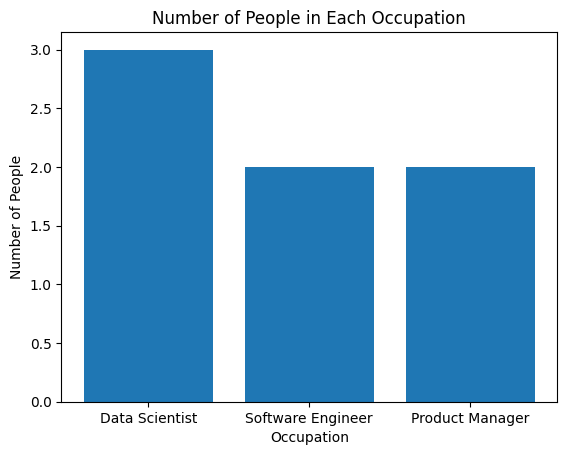

In [ ]:
import matplotlib.pyplot as plt

# Get the number of people in each occupation
n_people_per_occupation = df['occupation'].value_counts()

# Create a bar chart
plt.bar(n_people_per_occupation.index, n_people_per_occupation.values)
plt.xlabel('Occupation')
plt.ylabel('Number of People')
plt.title('Number of People in Each Occupation')
plt.show()


In [ ]:
#Sorting
print(df.sort_values('age'))


    name   age         occupation
0  Alice  25.0  Software Engineer
6  Frank  25.0               None
2  Bobby  29.0     Data Scientist
5    Eve  29.0    Product Manager
1    Bob  30.0     Data Scientist
3  Carol  35.0    Product Manager
4   Dave  40.0  Software Engineer
7  Grace   NaN     Data Scientist


In [ ]:
# Filtering
# Filter those who are Data Scientists:
print(df[df['occupation'] == 'Data Scientist'])


    name   age      occupation
1    Bob  30.0  Data Scientist
2  Bobby  29.0  Data Scientist
7  Grace   NaN  Data Scientist


In [ ]:
#  Groupby Operations
# Find the average age per occupation:
print(df.groupby('occupation')['age'].mean())


occupation
Data Scientist       29.5
Product Manager      32.0
Software Engineer    32.5
Name: age, dtype: float64


In [ ]:
# Fill missing age with the mean age of people who have the same occupation:

# Compute the mean age for each occupation
mean_age_by_occupation = df.groupby('occupation')['age'].mean()

# Fill missing values based on the mean age in the same occupation
for occupation, mean_age in mean_age_by_occupation.items():
    df.loc[df['occupation'] == occupation, 'age'] = df.loc[df['occupation'] == occupation, 'age'].fillna(mean_age)
print(df)

In [ ]:
# Adding Columns
# Add a column to indicate if someone is older than 30:
df['older_than_30'] = df['age'] > 30
df

,name,age,occupation,older_than_30
0,Alice,25.0,Software Engineer,False
1,Bob,30.0,Data Scientist,False
2,Bobby,29.0,Data Scientist,False
3,Carol,35.0,Product Manager,True
4,Dave,40.0,Software Engineer,True
5,Eve,29.0,Product Manager,False
6,Frank,25.0,None,False
7,Grace,NaN,Data Scientist,False


In [ ]:
df.query('age > 30')


,name,age,occupation,older_than_30
3,Carol,35.0,Product Manager,True
4,Dave,40.0,Software Engineer,True


In [ ]:
# Renaming Columns
# Rename the 'older_than_30' column to 'senior':

df.rename(columns={'older_than_30': 'senior'}, inplace=True)
df

,name,age,occupation,senior
0,Alice,25.0,Software Engineer,False
1,Bob,30.0,Data Scientist,False
2,Bobby,29.0,Data Scientist,False
3,Carol,35.0,Product Manager,True
4,Dave,40.0,Software Engineer,True
5,Eve,29.0,Product Manager,False
6,Frank,25.0,None,False
7,Grace,NaN,Data Scientist,False


**Interpolation of Missing Values**

Sometimes, you might want to fill missing values using interpolation based on other values in the Series.

In pandas, the interpolate() method is more versatile than one might initially think. It's not limited to just **linear interpolation**; it also includes methods for **polynomial interpolation**, **cubic interpolation**, and so on.



In [ ]:
s_interpolated = s_missing.interpolate()
print(s_interpolated)


a    1.0
b    2.0
c    3.0
d    3.0
dtype: float64


In [ ]:
# Create a Series with missing data
s = pd.Series([-1 ,1, np.nan, np.nan, 16, 25, 36])

# Linear interpolation (default)
linear_interpolated = s.interpolate()
print("Linear Interpolated:")
print(linear_interpolated)

# Polynomial interpolation
polynomial_interpolated = s.interpolate(method='polynomial', order=2)
print("Polynomial Interpolated:")
print(polynomial_interpolated)

# Cubic interpolation
cubic_interpolated = s.interpolate(method='cubic')
print("Cubic Interpolated:")
print(cubic_interpolated)


Linear Interpolated:
0    -1.0
1     1.0
2     6.0
3    11.0
4    16.0
5    25.0
6    36.0
dtype: float64
Polynomial Interpolated:
0    -1.000000
1     1.000000
2     4.346457
3     9.141732
4    16.000000
5    25.000000
6    36.000000
dtype: float64
Cubic Interpolated:
0    -1.00
1     1.00
2     4.28
3     9.17
4    16.00
5    25.00
6    36.00
dtype: float64


The cubic interpolation method requires more than 3 data points.

It does not handle boundary conditions very well, especially when the missing data is at the start or end of the Series. This is why you're seeing a ValueError.


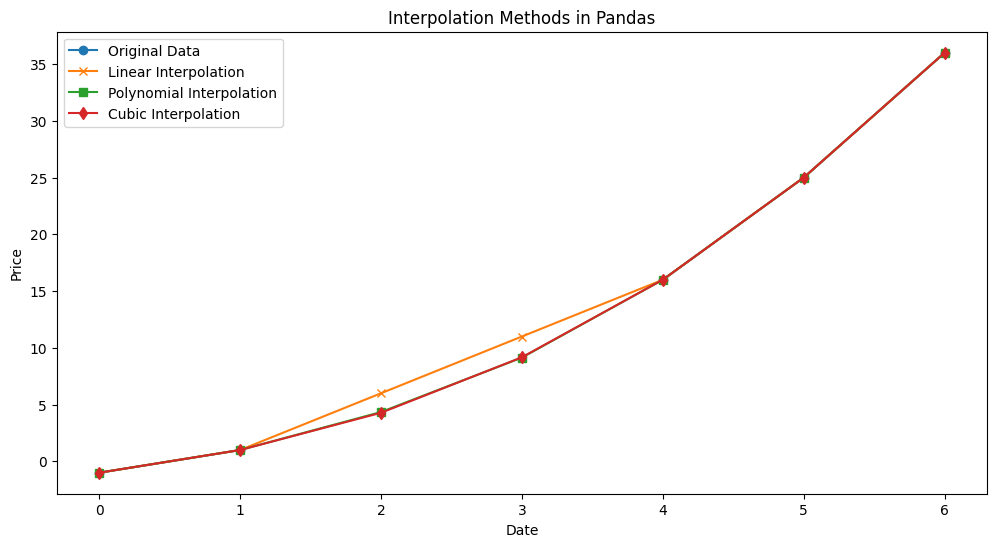

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(s.index, s, marker='o', label='Original Data')
plt.plot(s.index, linear_interpolated, marker='x', label='Linear Interpolation')
plt.plot(s.index, polynomial_interpolated, marker='s', label='Polynomial Interpolation')
plt.plot(s.index, cubic_interpolated, marker='d', label='Cubic Interpolation')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Interpolation Methods in Pandas')
plt.show()


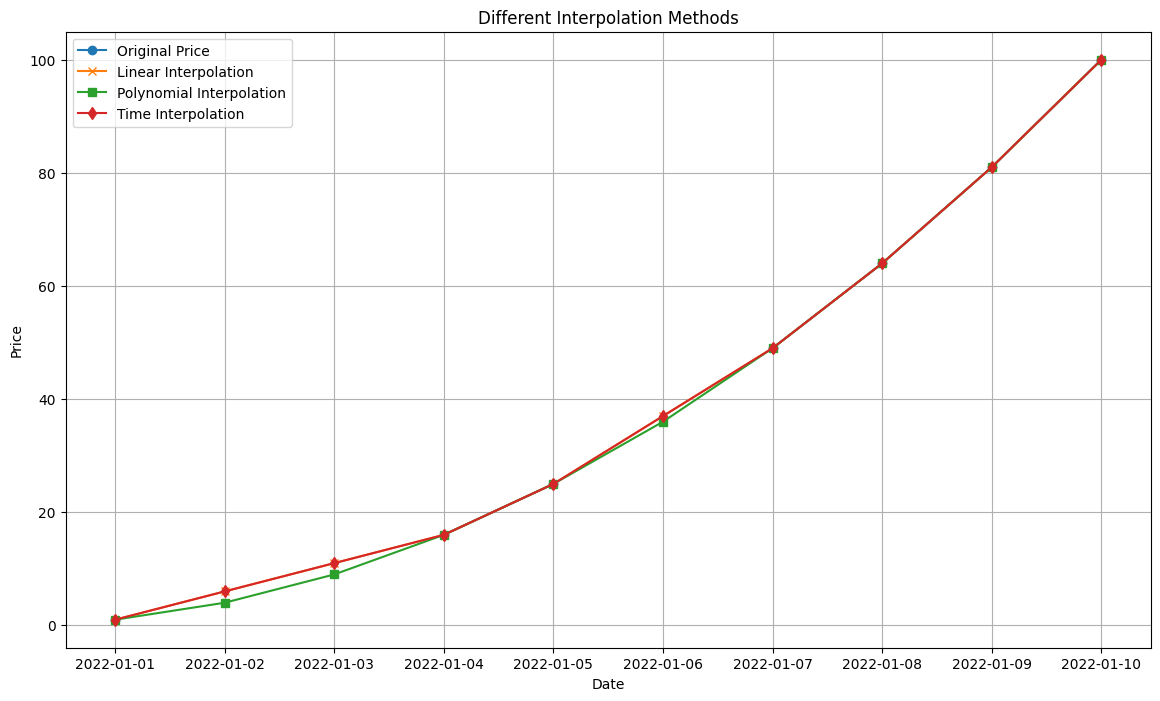

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample DataFrame
df = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'Price': [1, np.nan, np.nan, 16, 25, np.nan, 49, 64, 81, 100]
})

df.set_index('Date', inplace=True)

# Linear interpolation
df['Linear_Fill'] = df['Price'].interpolate(method='linear')

# Polynomial interpolation
df['Poly_Fill'] = df['Price'].interpolate(method='polynomial', order=2)

# Time interpolation
df['Time_Fill'] = df['Price'].interpolate(method='time')

# Plotting
plt.figure(figsize=(14, 8))

# Plot original 'Price'
plt.plot(df.index, df['Price'], marker='o', label='Original Price')

# Plot linear interpolation
plt.plot(df.index, df['Linear_Fill'], marker='x', label='Linear Interpolation')

# Plot polynomial interpolation
plt.plot(df.index, df['Poly_Fill'], marker='s', label='Polynomial Interpolation')

# Plot time interpolation
plt.plot(df.index, df['Time_Fill'], marker='d', label='Time Interpolation')

plt.legend()
plt.title('Different Interpolation Methods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


**Review:**

In [ ]:
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Carol'],
    'age': [25, None, 35]
})
new_df = df.fillna(0)
print("Original DataFrame:")
print(df)
print("New DataFrame:")
print(new_df)
# Will the change be reflected in df as well or just new_df?

In [ ]:
# How can you set an existing column as the index in a DataFrame?
# A. df.index()
# B. df.set_index()
# C. df.reindex()
# D. df.reset_index()



In [ ]:
# Handling Missing Data
# Which function replaces NaN values with a specific value in a DataFrame?
# A. df.dropna()
# B. df.fillna()
# C. df.replace()
# D. df.nonzero()


In [ ]:
# Data Transformation
# What does the apply() function do?
# A. Maps a function to each element in a Series
# B. Applies a function along an axis of the DataFrame
# C. Replaces values in a DataFrame
# D. Applies a function to each element in a DataFrame

In [ ]:
# Querying Data
# How can you filter rows based on a condition in a DataFrame?
# A. df.filter()
# B. df.query()
# C. df.where()
# D. All of the above


In [ ]:
# NumPy and Pandas
# What are Pandas DataFrames primarily built from?
# A. Python Lists
# B. NumPy Arrays
# C. Python Dictionaries
# D. Tensors


In [ ]:
# Pandas and Databases
# What function would you use to read from an SQL database into a DataFrame?
# A. df.from_sql()
# B. df.read_sql()
# C. df.to_sql()
# D. df.sql_read()

In [ ]:
# What does the df.info() function return?
# A. Summary statistics of the DataFrame
# B. First 5 rows of the DataFrame
# C. Metadata about the DataFrame such as data types and non-null values
# D. Last 5 rows of the DataFrame


In [ ]:
# What would df['column'].dtype return?
# A. Number of unique values in the column
# B. Data type of the column
# C. Mean value of the column
# D. Maximum value in the column


In [ ]:
# What does setting inplace=True in a function like df.drop() do?
# A. Makes the function return a new DataFrame
# B. Modifies the existing DataFrame without creating a new one
# C. Makes the function run faster
# D. Returns the dropped rows

In [ ]:
# What's a DataFrame's favorite movie?
# A. The Matrix
# B. The Notebook
# C. Inception
# D. Nullman


In [ ]:
# Which method is used to filter rows in a DataFrame based on conditions?
# A. df.gossip()
# B. df.interrogate()
# C. df.query()
# D. df.judge()


In [ ]:
# What is the difference between the map() and apply() functions?
# Describe a situation where you might want to use apply() instead of map().